In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
def handleRate(value):
    try:
        value = str(value).split('/')[0].strip()
        return float(value)
    except:
        return np.nan

df['rate'] = df['rate'].apply(handleRate)


In [4]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

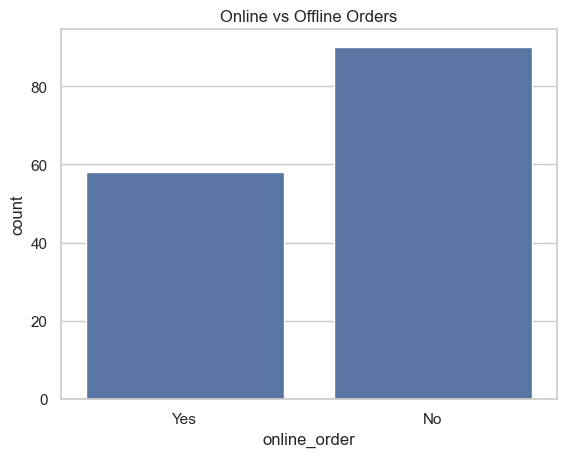

In [5]:
sns.countplot(x='online_order', data=df)
plt.title('Online vs Offline Orders')
plt.show()

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


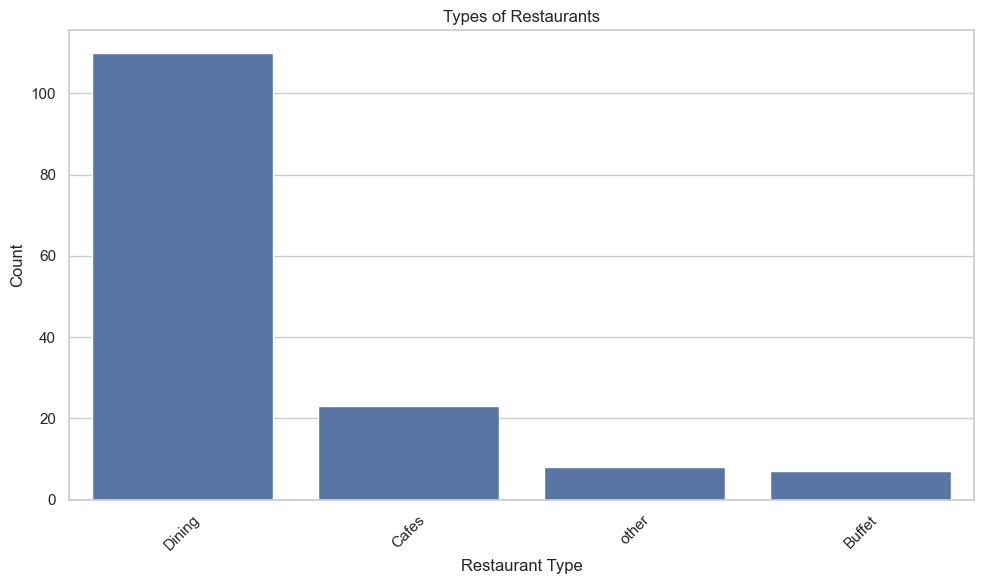

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Types of Restaurants")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

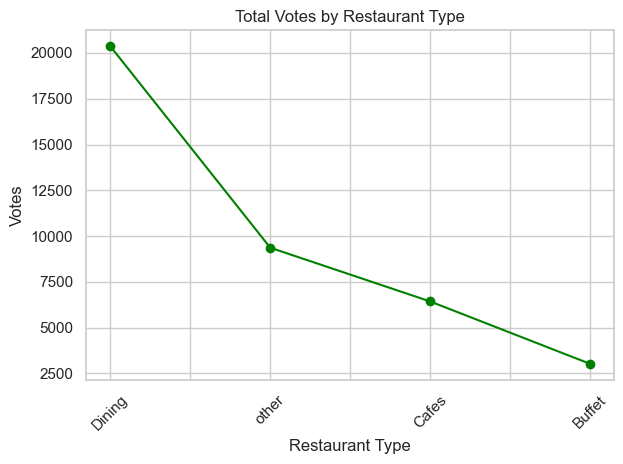

In [8]:
grouped_votes = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
grouped_votes.plot(kind='line', marker='o', color='green')
plt.title('Total Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
max_votes = df['votes'].max()
top_restaurant = df[df['votes'] == max_votes]['name']
print("Restaurant with the highest votes:")
print(top_restaurant)

Restaurant with the highest votes:
38    Empire Restaurant
Name: name, dtype: object


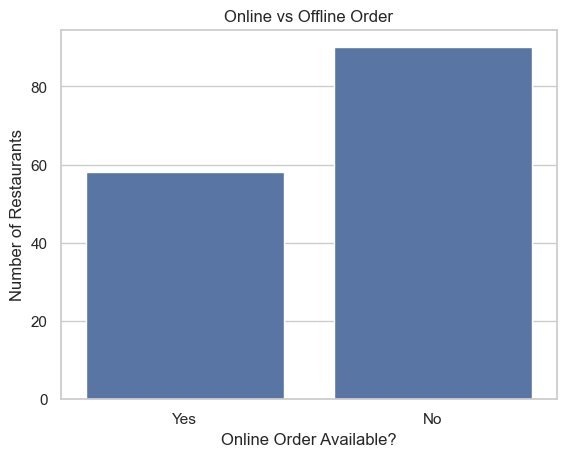

In [10]:
sns.countplot(x='online_order', data=df)
plt.title("Online vs Offline Order")
plt.xlabel("Online Order Available?")
plt.ylabel("Number of Restaurants")
plt.show()

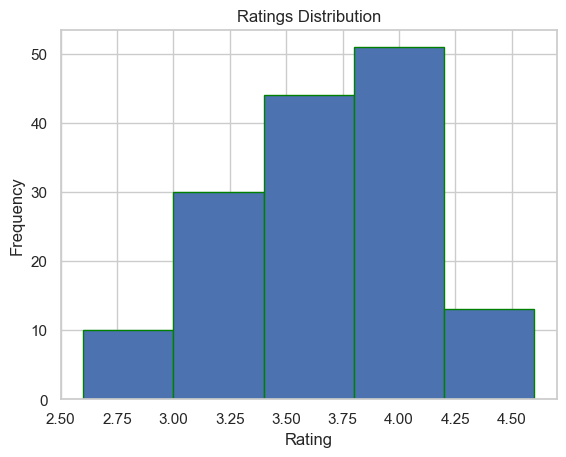

In [16]:
plt.hist(df['rate'].dropna(), bins=5, edgecolor='green')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


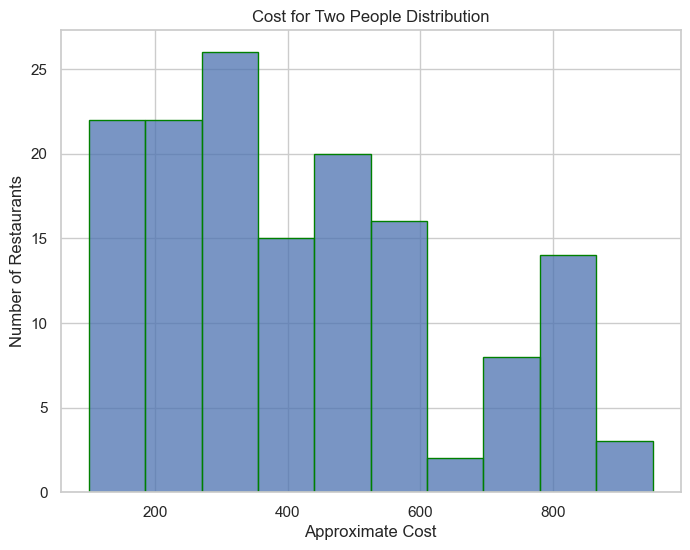

In [18]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace(',', '', regex=True)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

plt.figure(figsize=(8,6))
sns.histplot(df['approx_cost(for two people)'].dropna(), bins=10, edgecolor='green')
plt.title("Cost for Two People Distribution")
plt.xlabel("Approximate Cost")
plt.ylabel("Number of Restaurants")
plt.show()

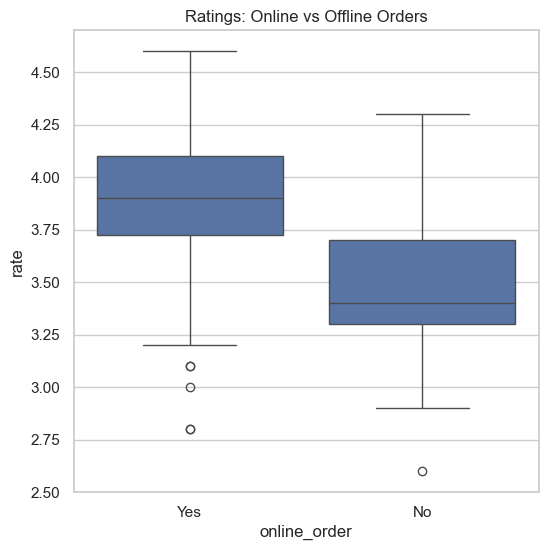

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Ratings: Online vs Offline Orders")
plt.show()

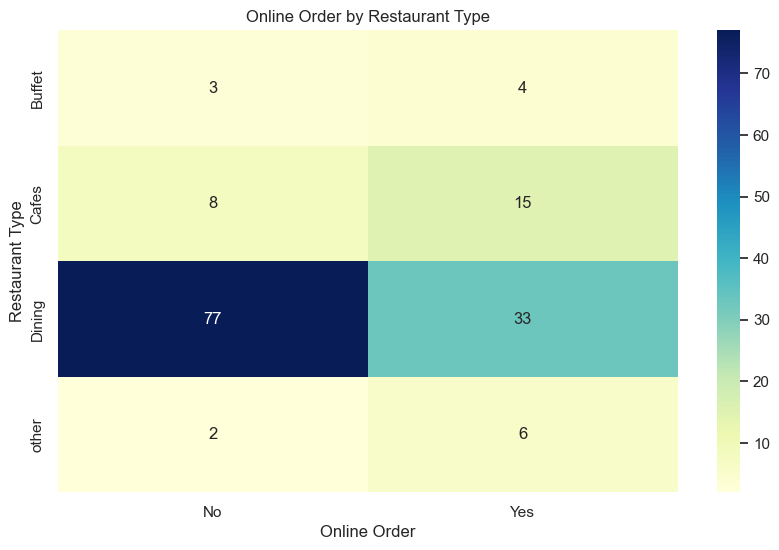

In [20]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Online Order by Restaurant Type')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()